Given the customer data, the goal is to:

*   Come up with a customer profile (characteristics of a customer) of the
   different products
*   Perform univariate and multivariate analyses
*   Generate a set of insights and recommendations that will help the company in
   targeting new customers.





  
  
  

In [69]:
#Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

#libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to actually display the graphs
%matplotlib inline

#Read the csv into a dataframe
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CardioGoodFitness.csv')
#We loaded information about the customers of the treadmill product(s) of a retail store called Cardio Good Fitness

#import libraries for interactive plots
import plotly.express as px

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#Let's get an idea of the volume of the data
customers.shape


(180, 9)

The dataset has 180 rows with 9 columns - so a small dataset really

In [72]:
#what are the 9 columns
customers.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Here are the column descriptions provided as part of the Problem Statement

Data Dictionary
------------------
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run

In [73]:
#lets look into the data structure
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We got 3 columns(Product, Gender, MaritalStatus) that hold string values and the remaining 6 columns hold numerical values. 
All columns seem to hold values across all rows - no null values in the data. 

In [75]:
#lets take a quick look at the data
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [76]:
#Double check to make sure there are no null values in the data
customers.isnull().sum().sum()

0

In [77]:
#Check for duplicate values
customers.duplicated().sum()

0

Customer data seems clean - no null or duplicate values found

In [79]:
#lets look into the statistical summary of the data - include data for non-numerical columns as well
customers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


*   We have data pertaining to 3 different products.
*   The customer ages seem to range between 18 and 50 years with 50% of the customer base in the 24 to 33 age group. The average age is about 29.
*   Looks like there are more male customers - 104 vs 76.
*   It looks like all the users have atleast graduated from high school. 50% of the customer base seems to have some sort of college education. 
*   Customers with partners seem to be more than singles - 107 vs 73. 
*   50% of the users plan to use the Treadmill 3 to 4 times a week.
*   On an average, customers seems to have rated themselves ~3 on the fitness scale.
*   Average income is about 54K and 50% of the customer base makes between 44 to 58K.
*   We got a wide range for the number of miles that the customers intend to run. The minimum is 21 miles and max is 360 miles. 50% of the customers intend to run anywhere between 66 - 114.75 miles in a week.






In [80]:
customers['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

 TM195, TM498 & TM798 are the 3 unique products/TreadMill models

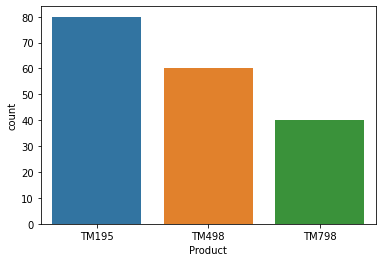

In [81]:
#Let us start out by conducting univariant analysis
#A breakdown of the 3 products
sns.countplot(data=customers, x='Product');

In [82]:
customers['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

TM195 seems to be the most popular Treadmill with 80 users.

TM498 being the second most popular with 60 users.

TM798 has 40 users.

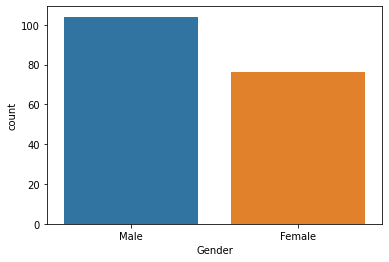

In [83]:
#Composition of Male vs Female
sns.countplot(data=customers, x='Gender');

In [84]:
customers['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Based on the stastical summary attained from the 'describe' command, we were aware that the customer base is made of more Males than Females.

Male users add up to 104 and female users add up to 76.

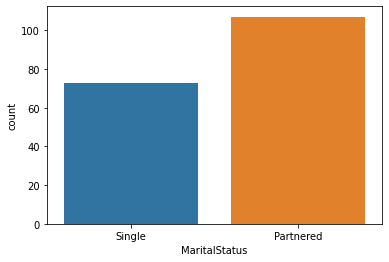

In [85]:
#Composition of Partnered vs Single
sns.countplot(data=customers, x='MaritalStatus');

In [86]:
customers['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Based on the stastical data from the describe command, we were also aware that the customer base has more married folks compared to singles.

Partnered customers are 107 vs 73 Singles.

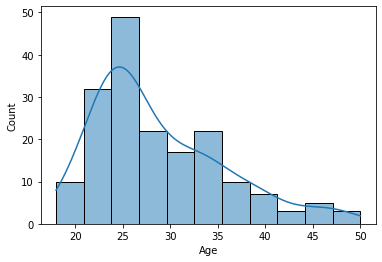

In [87]:
#Lets take a closer look at the age graph
sns.histplot(data=customers, x='Age', kde=True);

In [88]:
customers['Age'].mode()

0    25
dtype: int64

The mode is 25. 

The data is skewed to the right. 

Lets do a box chart to get some more insights into customer ages.

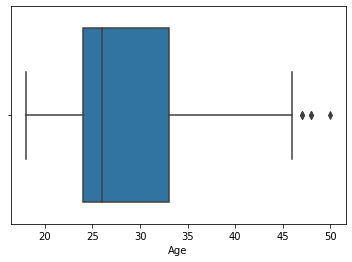

In [89]:
#Lets generate a box plot for the Age column
sns.boxplot(data=customers, x='Age');

The data is positively skewed.

50% of the users are in the 23 to 33 age group.

25% of the users are below 23.

75% of the users are below 33.

There are a few outliers and the oldest customer is 50.

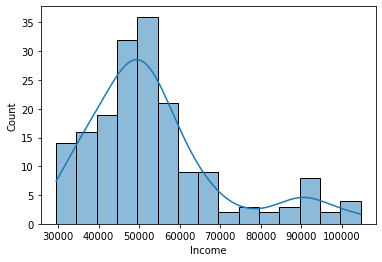

In [90]:
#Now lets gain more insights into the Customer Income 
sns.histplot(data=customers, x='Income', kde=True);

In [91]:
customers['Income'].mode()

0    45480
dtype: int64

The income data seems to be right skewed.
Mode is ~45k.

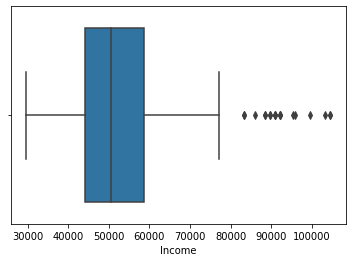

In [92]:
sns.boxplot(data=customers, x='Income')

This plot too shows that the data is skewed to the right. 

The median is the same as the mean which is 50,000. 

50% of the customers make between 45 and 60K. 

The lower limit is at 30,000.

There are a few outliers outside the higher limit of ~78k

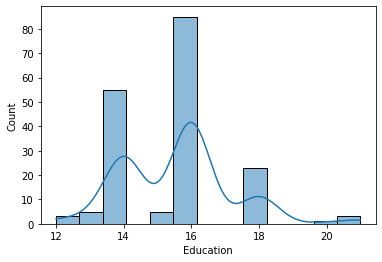

In [93]:
#Lets take a closer look at the Education received
sns.histplot(data=customers, x='Education', kde=True);

In [94]:
customers['Education'].mode()

0    16
dtype: int64

Looks like most customers have attended college

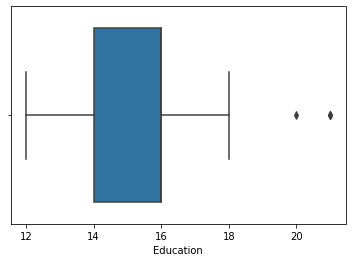

In [95]:
sns.boxplot(data=customers, x='Education');

50% of the customer base seems to have attended college. We got 2 outliers
indicating some form of advanced education.

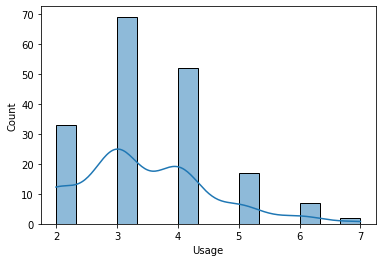

In [96]:
#Lets take a closer look at the Usage data
sns.histplot(data=customers, x='Usage', kde=True);

The 'Usage' data is skewed to the right.
Mode is 3.

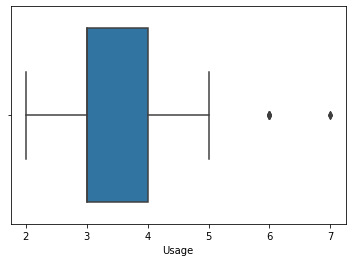

In [97]:
sns.boxplot(data=customers, x='Usage');

50% of the users plan to use the TreadMill 3 to 4 times a week.
25% of the users plan to use it less than 3 times a week.
25% of the users plan to use it more than 4 times a week.
There are a couple of outliers to the right.

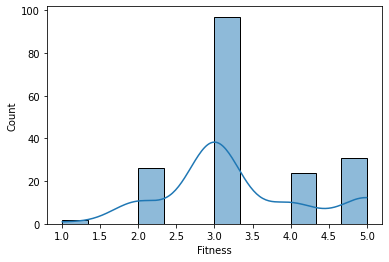

In [98]:
#Lets take a closer look at the self graded Fitness levels
sns.histplot(data=customers, x='Fitness', kde=True);

In [99]:
customers['Fitness'].mode()

0    3
dtype: int64

Mode is 3.0. 

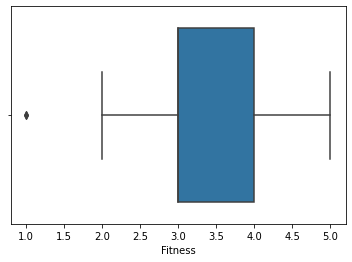

In [100]:
sns.boxplot(data=customers, x='Fitness');

The Fitness data seems to be left skewed with one outlier below the lower limit of 2.
Median is 3.0. 50% of the customers have given themselves a rating between 3
and 4. 

25% of the customers have given themselves a rating below 3. 

25% of the customers have given themselves a rating greater than 4.

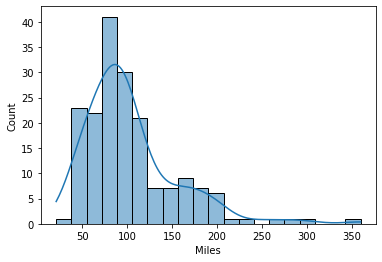

In [101]:
#Lets take a closer look at the Miles intended to be run by the users
sns.histplot(data=customers, x='Miles', kde=True);

In [102]:
customers['Miles'].mode()

0    85
dtype: int64

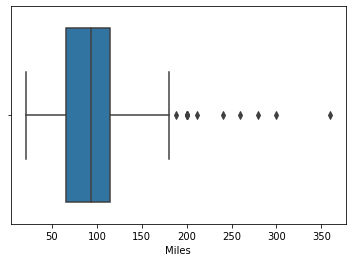

In [104]:
sns.boxplot(data=customers, x='Miles');

The Miles data seems to be skewed to the right.
50% of the users seem to want to run between 60 to 120 Miles. 
25% of the users expect to run below ~60 miles.
25% of the users intend to run more than ~120 miles.
There are a few outliers past the higher limit of ~190.  

In [105]:
#Now that we have a pretty decent understanding of the data in individual columns,
#lets move on to bivariate analysis. 

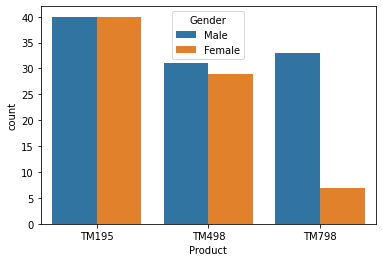

In [106]:
#Let's look at the Gender mix at the product level
sns.countplot(data=customers, x='Product', hue='Gender');

What stands out is that TM798 does not seem to be preferred by the Female Gender. TM195 seems to have the user base split exactly into half - 50% male and 50% female users. TM498 seems to have slightly more male users.

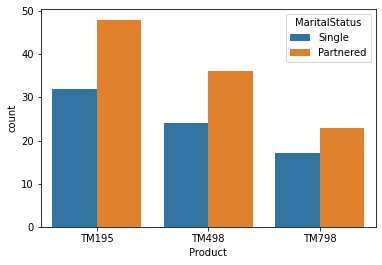

In [107]:
#Product usage in relation to MaritalStatus
sns.countplot(data=customers, x='Product', hue='MaritalStatus');

Partnered customers seem to be in majority(107) over Singles(73).

Besides that nothing really seem to stand out.

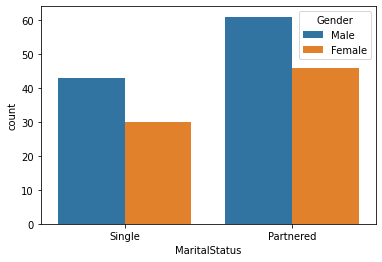

In [108]:
#Let us plot Gender vs MaritalStatus
sns.countplot(data=customers, x='MaritalStatus', hue='Gender');

Men with partners (#60) seem to be the majority of the customer base followed by
women with partners(#45). Single women (#30), seems to be the minority in the customer base.


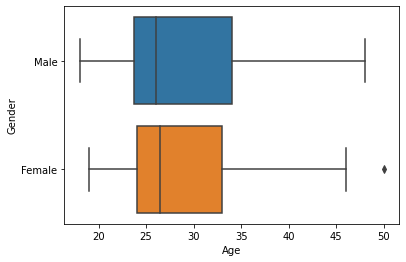

In [109]:
#Lets generate a box plot for Age vs Gender
sns.boxplot(data=customers, x='Age', y='Gender');

The age distribution seems to be about the same between the male and female customers.

In [110]:
#Let us take a look at the correlation between the numeric columns
correlation = customers.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


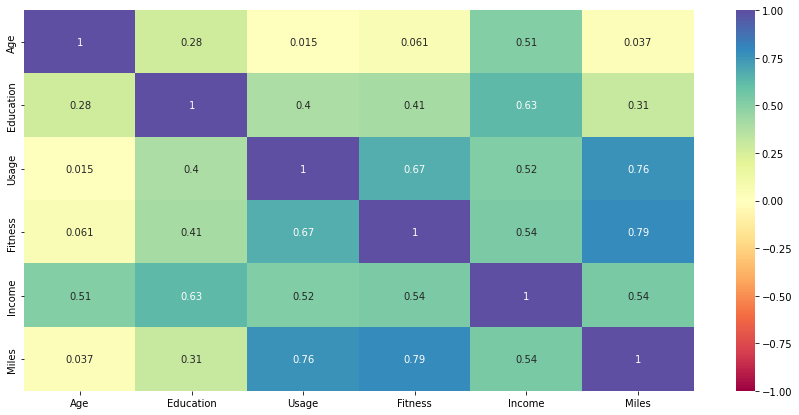

In [111]:
# Plotting Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot=True, cmap="Spectral");

We have an all-positive heatmap - one variable goes up, the other goes up/increases as well.

1. Usage, as expected, seems to have a strong correlation with both Miles and Fitness
2. Eduction too, as expected, seems to have a strong correlation with Income.


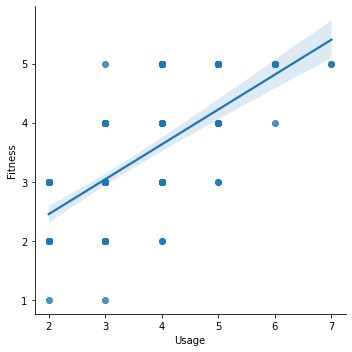

In [112]:
#Lets draw a linear model plot to confirm the positive correlation between Usage and Fitness
sns.lmplot(data=customers, x='Usage', y='Fitness');

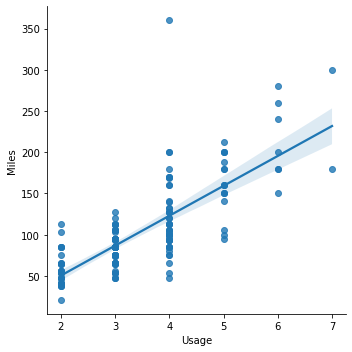

In [113]:
#Lets draw a linear model plot to confirm the correlation between Usage and Miles
sns.lmplot(data=customers, x='Usage', y='Miles');

In [114]:
#Lets get the statistical summary by product group
customers[customers['Product'] =='TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [115]:
customers[customers['Product'] =='TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [116]:
customers[customers['Product'] =='TM798'].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


Going by the income range, TM798 clearly stands out as a high-end product. This customer base also has given themselves higher fitness rating combined with high usage and miles. So this product is preferred by fitness enthusiasts. 

Now lets get some visuals of the numerical values grouped by product, so we could take a closer look at the variations. 

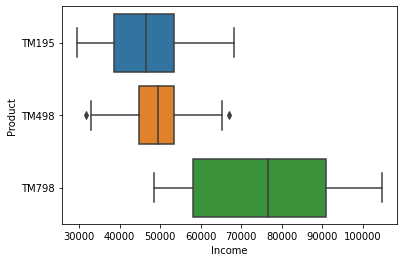

In [117]:
#Lets plot the Income per product group
sns.boxplot(data=customers, x='Income', y='Product');

In [118]:
customers.groupby('Product')['Income'].median()

Product
TM195    46617.0
TM498    49459.5
TM798    76568.5
Name: Income, dtype: float64

TM798 --> Based on the income scale at the product level, TM798 clearly seems to be a high-end model. 50% of the customers seem to make between 60k to 90k.25% of the customers make more than 90k.

TM195 --> Going by the income range, this seems like a low-end/basic model perhaps for the beginners with no bells and whistles. This also explains the large customer base. 50% of the customers seem to make between 38K and 54K.

TM498 --> 50% of the customers seem to make between 44 to 54k. This is the 2nd most sold model, perhaps one level above the basic, TM195.

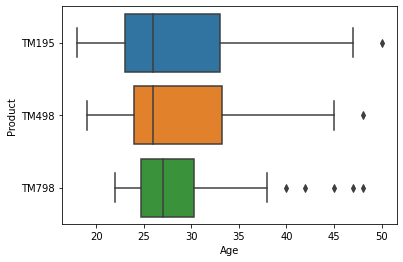

In [119]:
#Lets take a look at age distribution per product
sns.boxplot(data=customers, x='Age', y='Product');


1.   TM195 --> 50% of the users seem to be between 23 to 33 years of age. The age group here has a wide range starting at 18 and going all the way up to 50. 
2.   TM498 -  50% of the users seem to be between 24 to 34 years of age. The age distribution seem to be pretty much similar to TM195.
3.   TM798 - 50% of the users are between 25 and 30 years of age. There are also a few outliers/older folks that seem to be using this TreadMill - perhaps it has more advanced features that cater to the older crowd.

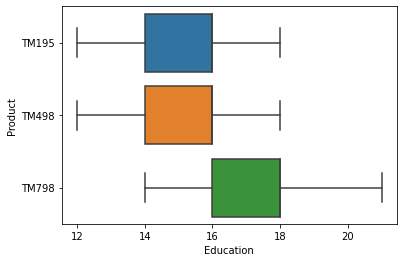

In [120]:
#Lets plot the years of education against the product group
sns.boxplot(data=customers, x='Education', y='Product');

In [121]:
customers.groupby('Product')['Education'].median()

Product
TM195    16.0
TM498    16.0
TM798    18.0
Name: Education, dtype: float64

TM195 and TM498 --> Majority of the customers of both these low-end models  seem to have had some form of college education. 

TM798 --> Customers of the highend model, TM798 seem to have had a college degree or higher.

In [122]:
customers.groupby('Product')['Age'].median()

Product
TM195    26.0
TM498    26.0
TM798    27.0
Name: Age, dtype: float64

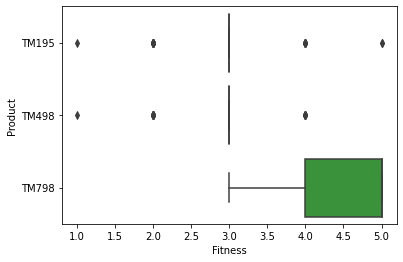

In [123]:
#Lets plot the self rated fitness level per product group
sns.boxplot(data=customers, x='Fitness', y='Product');

In [124]:
customers.groupby('Product')['Fitness'].median()

Product
TM195    3.0
TM498    3.0
TM798    5.0
Name: Fitness, dtype: float64

TM195 and TM498 --> Customers of these 2 basic products seem to have given themselves an average fitness rating of 3. 

TM798 --> 50% of the customers have given themselves a fitness rating between 4 and 5 (with 5 being very-fit). It looks like this model is prefered by fitness enthusiasts.

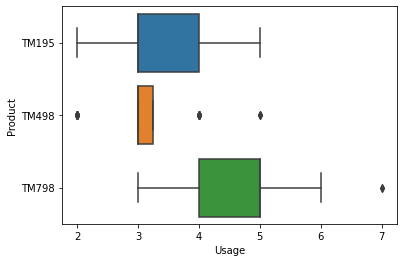

In [125]:
#Lets plot the usage per product group
sns.boxplot(data=customers, x='Usage', y='Product');

In [126]:
customers.groupby('Product')['Usage'].median()

Product
TM195    3.0
TM498    3.0
TM798    5.0
Name: Usage, dtype: float64

TM195 --> 50% of the customers expect to use the product 3 to 4 times a week. 

TM498 --> 50% of the customers expect to use it 3 times a week. 

TM798 --> 50% of the customers expect to use the TreadMill 4 to 5 times a week. This again goes to solidify the point that these users are  fitness enthusiasts.

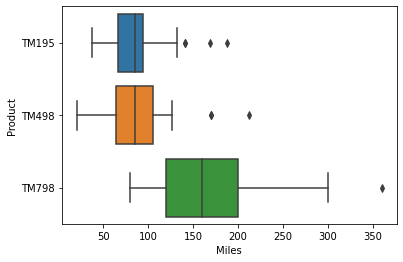

In [127]:
#Lets plot the Miles per product group
sns.boxplot(data=customers, x='Miles', y='Product');

In [128]:
customers.groupby('Product')['Miles'].median()

Product
TM195     85.0
TM498     85.0
TM798    160.0
Name: Miles, dtype: float64

TM195 --> 50% of the customers expect to run between 66 to 95 miles a week.

TM498 --> 50% of the customers expect to run anywhere from 120 to 200 miles. Though these users intend to use it less frequently (3 times a week), they seem to expect to cover more distance than the TM195 users who expect to use it 3 to 4 times a week. So these users, in comparison to the users of TM195, have either a longer usage time.

TM798 --> 50% of the customers expect to cover between 120 to 200 Miles. That is a very impressive target for these fitness enthusiasts. 

In [129]:
#Let us take a closer look into the Gender and MaritalStatus stats for each Product
customers_temp= pd.crosstab(index=customers["Product"], columns=[customers["MaritalStatus"],customers["Gender"]])  
customers_temp

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

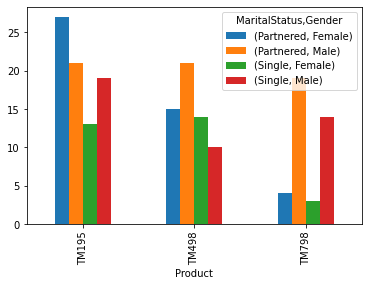

In [130]:
customers_temp.plot(kind='bar')

Partnered customers seem to form the majority of the userbase.

We have gone through the data and gathered insights about the 3 products and their corresponding customer base. Let's summarize.

Customer Profiles across Products
---------------------------------
**TM195:**  

> Given the highest customer base(44%) and the average customer income(~46k), this Treadmill most likely is the most affordable of the three.  

> Going by the average customer fitness levels(3 out of 5), weekly usage(3 out of 7) & miles covered, it seems to be the model for beginners.

> The customer base is split equally between men and women and the customer ages are between 18 and 50 (with 50% of them in the 23-33 age group). All good indicators that this model appeals to the masses. 

> The customer base has more Partnered men and Partnered women in comparison to single men and single women.


**TM498:**  

> Given the second highest customer base (33%) and a slightly higher average customer income compared to TM195(49k vs 46k), this model seems like a small upgrade from TM195.

> The customer base is split equally between men and women and 50% of the customers fall in the age group of 24 to 33 years. 

> Compared to TM195, these customers have a slightly lower average usage rate  as well as a slightly lower average fitness level. However these customers intend to cover more miles in a week. This could be an indicator that they intend to run longer than the TM195 customers.

> The customer base has more Partnered men and Partnered women in comparison to single men and single women.



**TM798:**  

> With the smallest customer base (22%) and the highest average customer income (75K),this stands out as a high-end model.

> This model has a very distinct customer profile - Only 21% of its user base is female while the other 2 models have an equal male to female ratio. It has the least number of women users (only 7 compared to 40 female users for TM195 and 29 for TM498).

> These customers have had the highest Education.

> 50% of the customers fall into the 25 to 30 year age group. There are also a hand full of folks between 40 to 50 years of age that seem to be using this TreadMill - perhaps it has more advanced features that cater to this age group as well.

> These customers have the highest average fitness levels (~5 with 5 being the fittest), highest usage levels (5 out of 7) and 50% of them intend to run a whopping 120 to 160 miles in a week. These customers are definitely fitness enthusiasts and seasoned runners who are willing to invest in the best.

> The customer base has more Partnered men in comparison to single men. Women just does not seem to prefer this model.


Overall
---------------------------------
*   Male customers are more than the female customers (104 vs 76) 
*   Partnered customers are higher in numbers compared to the customers who are single (107 vs 73). Single women are the minority in the customer base.



Recommendations
---------------------------------
1.   Invest in increasing the female customer base while maintaining the male customer base. 
2.   Invest in attracting single customers. Especially single women (only 30 of them) are the minority in the customer base.
3.   The average customer age is ~29 with 50% of the customers in the 24 to 33 year age group. Though the age range is 18 to 50, only 25% of the customers are older than 33. There seems to be an opportunity to increase the customer base that falls in the 33 to 50 year age group.
4.   Need to make it a priority to look into why the high end product, TM798, has just 7 women customers. Get feedback from these 7 users and see what they like and dislike about the product. 
5.   Given the current sales breakdown across products (80 TM195, 60 TM498 and 40 TM798), analyze to see if this is the most profitable mix. If selling more TM798s is profitable, perhaps spend more on targeting its potential customers.



